In [1]:
# Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Importing the dataset
df = pd.read_csv('bank-additional-full.csv', delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# LabelEncoding all Categorical variables
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['job'] = labelencoder.fit_transform(df['job'])
df['marital'] = labelencoder.fit_transform(df['marital'])
df['education'] = labelencoder.fit_transform(df['education'])
df['default'] = labelencoder.fit_transform(df['default'])
df['housing'] = labelencoder.fit_transform(df['housing'])
df['loan'] = labelencoder.fit_transform(df['loan'])
df['contact'] = labelencoder.fit_transform(df['contact'])
df['month'] = labelencoder.fit_transform(df['month'])
df['day_of_week'] = labelencoder.fit_transform(df['day_of_week'])
df['poutcome'] = labelencoder.fit_transform(df['poutcome'])
df['y'] = labelencoder.fit_transform(df['y'])

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = X_train.astype(float)
X_train = sc.fit_transform(X_train)

X_test = X_test.astype(float)
X_test = sc.transform(X_test)

In [6]:
# Fitting KNN to the Training set for K=1 to K=25
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = range(1, 26)
score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score.append(metrics.accuracy_score(y_test, y_pred))

Text(0.5, 1.0, 'Relation between K and Testing acuuracy')

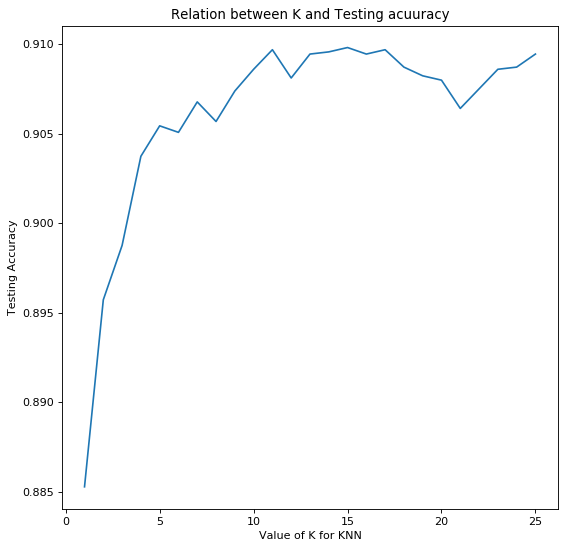

In [7]:
# Plotting the realtion between K and Testing Accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8), dpi=80)
plt.plot(k_range, score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title("Relation between K and Testing acuuracy")

### In general as the value of K increases there is a rise in the testing accuracy and then it falls. This rise and fall is actually quite typical when examining the relation between model complexity with testing accuracy. Testing accuracy panalizes the model that are too complex as well as model that are not complex enough. Therefore, you will see maximum testing accuracy when the model have right level of complexity. In this case, you will see the the k-nn classifier with a k value of 10 gave the maximum classification accuracy of 88.84%.

In [8]:
X = df.iloc[:, [0, 6]] # for age and loan classes
y = df.iloc[:, -1]
X.head(5)

,age,loan
0,56,0
1,57,0
2,37,0
3,40,0
4,56,2


In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = X.astype(float)
X = sc.fit_transform(X)

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
# Fitting KNN to the Training set
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 10)
clf.fit(X_train, y_train)
metrics.accuracy_score(y_test, clf.predict(X_test))*100

88.8443797038116

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


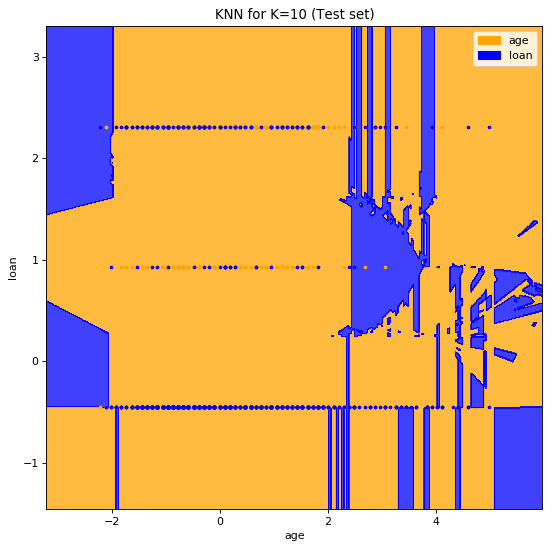

In [12]:
# Visualising the Test set results
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

plt.figure(figsize=(8, 8), dpi=80)
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], s=5,
                c = ListedColormap(('orange', 'blue'))(i), label = j)
    
plt.title('KNN for K=10 (Test set)')
plt.xlabel('age')
plt.ylabel('loan')
orange_patch = mpatches.Patch(color='orange', label='age')
blue_patch = mpatches.Patch(color='blue', label='loan')
plt.legend(handles=[orange_patch, blue_patch])
plt.show()

### Pythons’s scikit learn handles only numerical features. Hence the categorical variables  are converted to numerical by label encoder. The plot result for two numerical variable gives better result than the plot result for categorical variable. Therefore, we can say KNN classifier is shows better prediction for numerical variables.

## SVM

In [13]:
X = df.iloc[:, [0, 6]] # for age and loan classes
y = df.iloc[:, -1]
X.head(5)

,age,loan
0,56,0
1,57,0
2,37,0
3,40,0
4,56,2


In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = X.astype(float)
X = sc.fit_transform(X)

In [15]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
metrics.accuracy_score(y_test, classifier.predict(X_test))*100

88.8443797038116

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


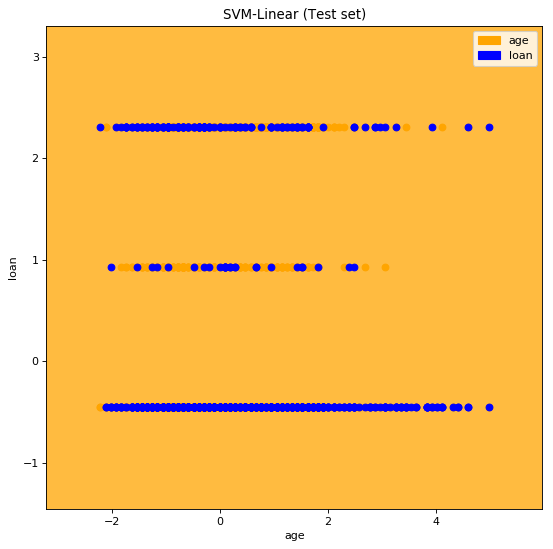

In [17]:
# Visualising the Test set results
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

plt.figure(figsize=(8, 8), dpi=80)
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
    
plt.title('SVM-Linear (Test set)')
plt.xlabel('age')
plt.ylabel('loan')
orange_patch = mpatches.Patch(color='orange', label='age')
blue_patch = mpatches.Patch(color='blue', label='loan')
plt.legend(handles=[orange_patch, blue_patch])
plt.show()

### The SVM classifier is a kernel-based supervised learning algorithm that classifies the data into two or more classes. SVM is particularly designed for binary classification. The linear kernel function performs well with linearly separable data set. From the analysis we can conculde that the KNN for K=10 and SVM(Linear) shows same accuracy score. 